In [12]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [13]:
seed = 21

In [14]:
from keras.datasets import cifar10

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [18]:
model = keras.Sequential()

In [19]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

In [20]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 142s 181ms/step - loss: 1.5623 - accuracy: 0.4417 - val_loss: 1.2249 - val_accuracy: 0.5621
Epoch 2/25
782/782 [==============================] - 143s 183ms/step - loss: 1.1387 - accuracy: 0.5998 - val_loss: 0.9261 - val_accuracy: 0.6776
Epoch 3/25
782/782 [==============================] - 133s 170ms/step - loss: 0.9854 - accuracy: 0.6556 - val_loss: 0.8476 - val_accuracy: 0.7081
Epoch 4/25
782/782 [==============================] - 132s 169ms/step - loss: 0.8986 - accuracy: 0.6878 - val_loss: 0.9595 - val_accuracy: 0.6755
Epoch 5/25
782/782 [==============================] - 132s 169ms/step - loss: 0.8345 - accuracy: 0.7110 - val_loss: 0.7111 - val_accuracy: 0.7521
Epoch 6/25
782/782 [==============================] - 131s 168ms/step - loss: 0.7812 - accuracy: 0.7317 - val_loss: 0.7304 - val_accuracy: 0.7465
Epoch 7/25
782/782 [==============================] - 130s 167ms/step - loss: 0.7443 - accuracy: 0.7423 - val_loss: 0.6832 -

In [36]:
model.evaluate(X_test, y_test, verbose=0)
print (y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


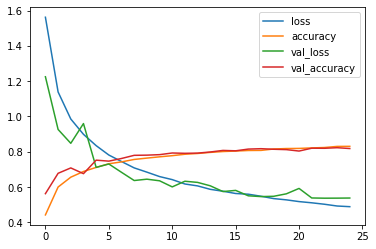

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [32]:
print ('samerewrewre')

samerewrewre
